In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('../notebooks/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# DROP THESES UNNECSSARY DATA 
df[df['culmen_length_mm'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(index = df[df['culmen_length_mm'].isna()].index, inplace=True)

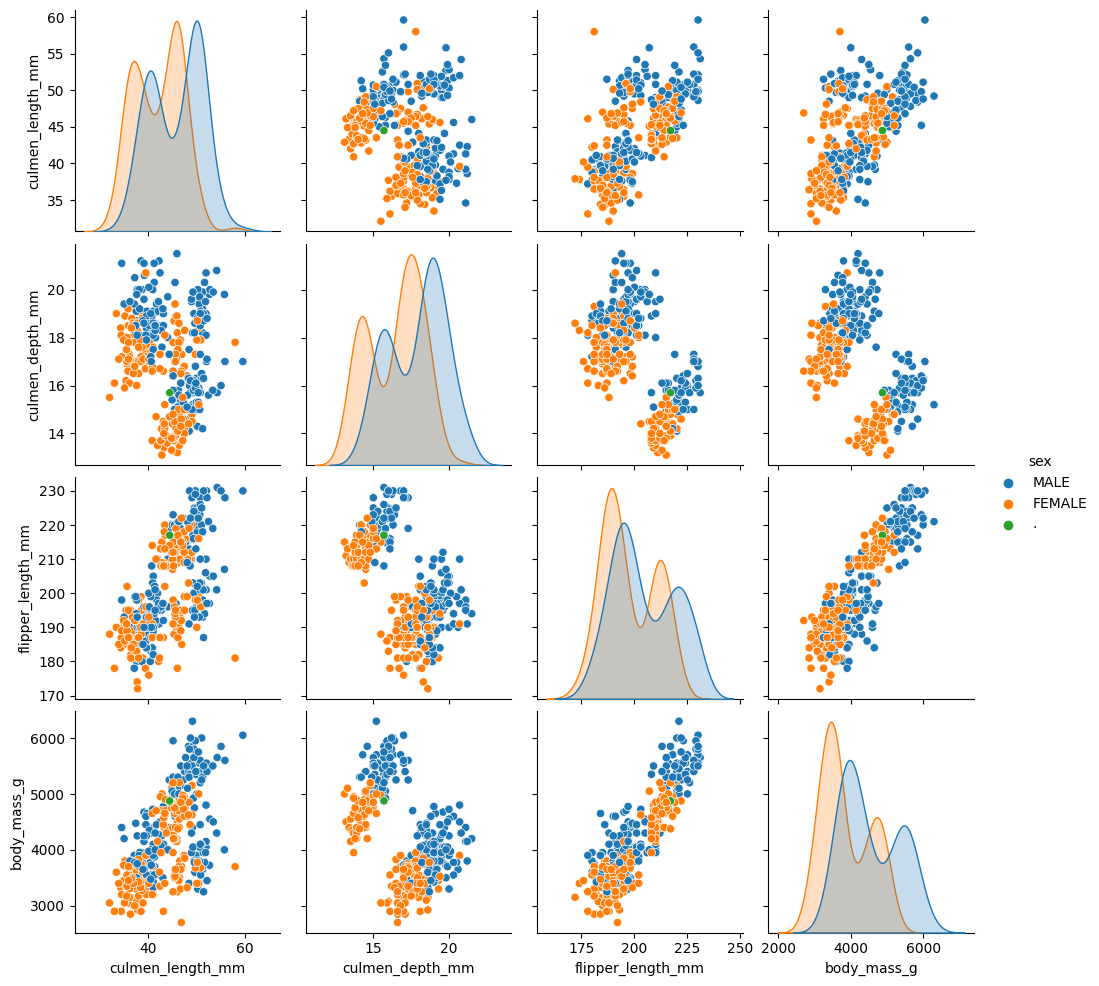

In [6]:
## CAN EXTRACT SEX BY CLASSIFICATION : KNN(might do well) or SVM or LOGISTIC REGRESSION 
sns.pairplot(data=df, vars=['culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='sex')

In [8]:
### TO DO ###
### INTERPOLATE MISSING FEATURES #####

In [10]:
## FIX ME
df = df.dropna()

In [24]:
df.at[336,'sex'] = 'FEMALE'

In [29]:
X = pd.get_dummies(df.drop(columns='species'), drop_first=True)
y = df['species']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',)


In [99]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_true=y_test, y_pred = model.predict(X_test)))


              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93        41
   Chinstrap       0.90      0.83      0.86        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.94      0.93      0.93       101
weighted avg       0.94      0.94      0.94       101



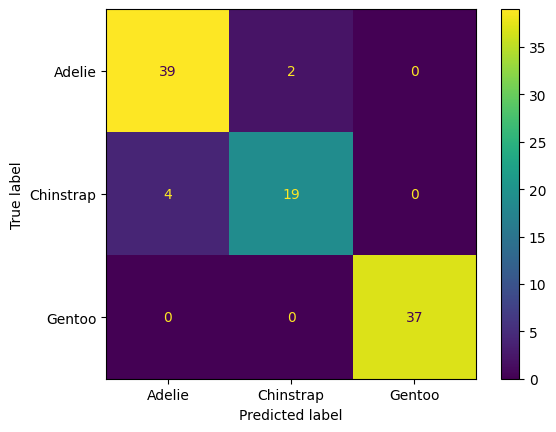

In [101]:
ConfusionMatrixDisplay(confusion_matrix=None).from_estimator(model, X_test, y_test)

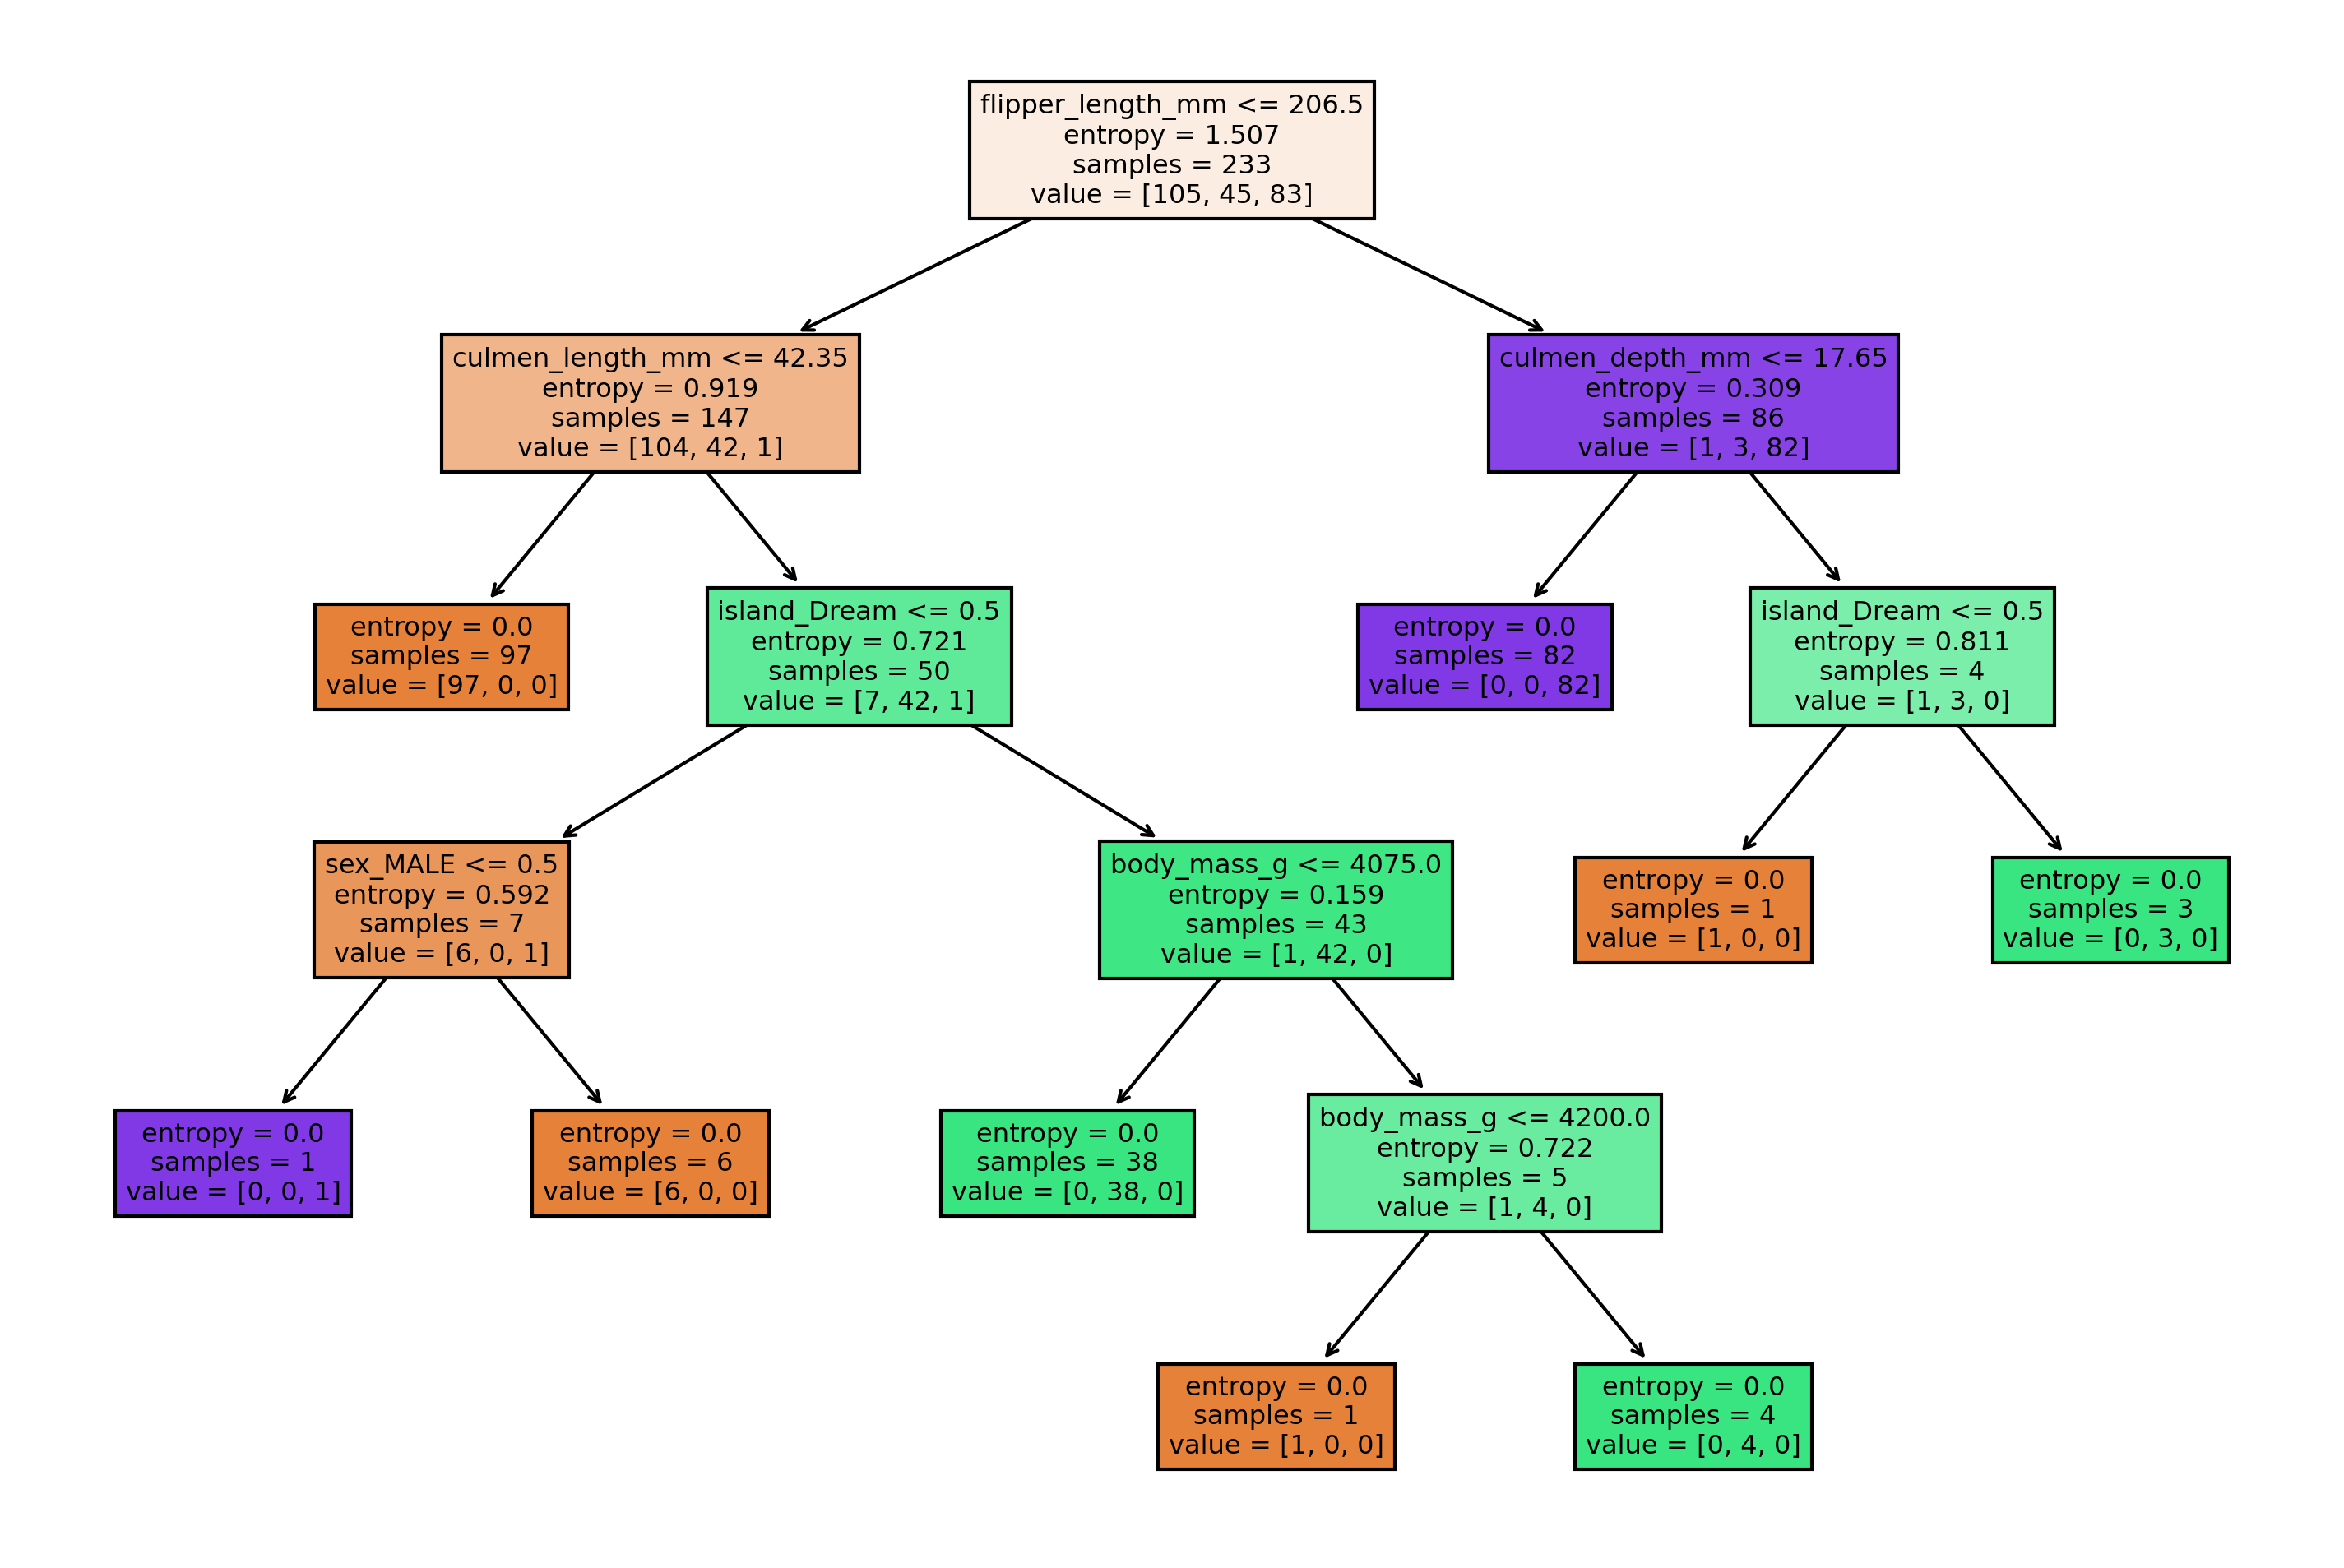

In [102]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=300)
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);